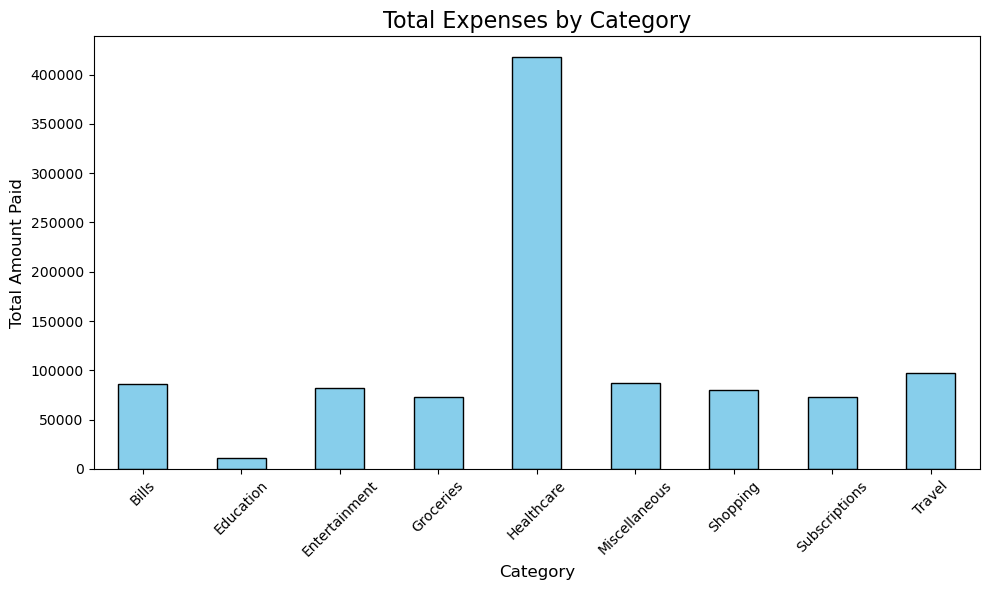

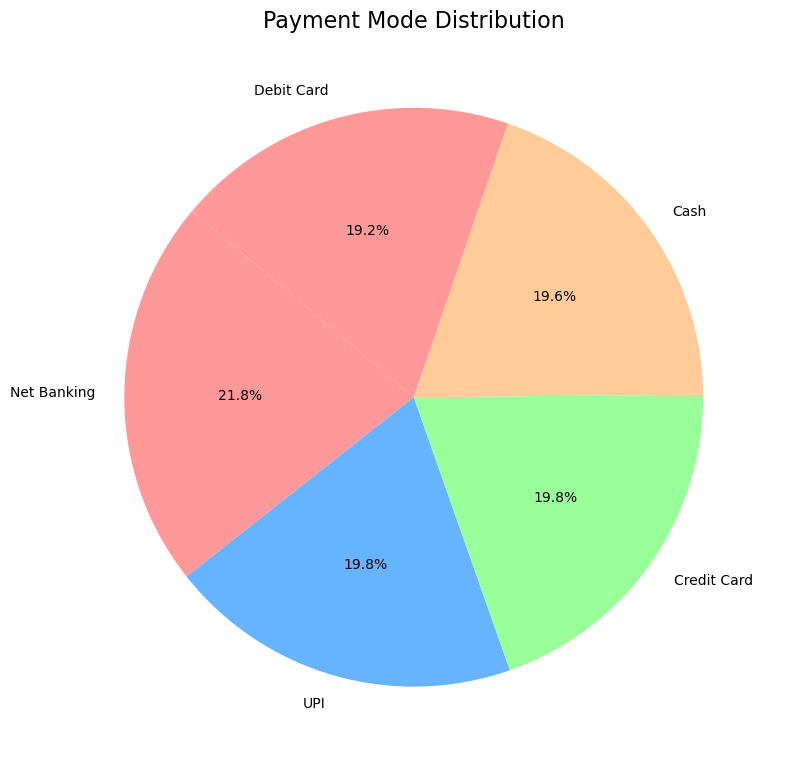

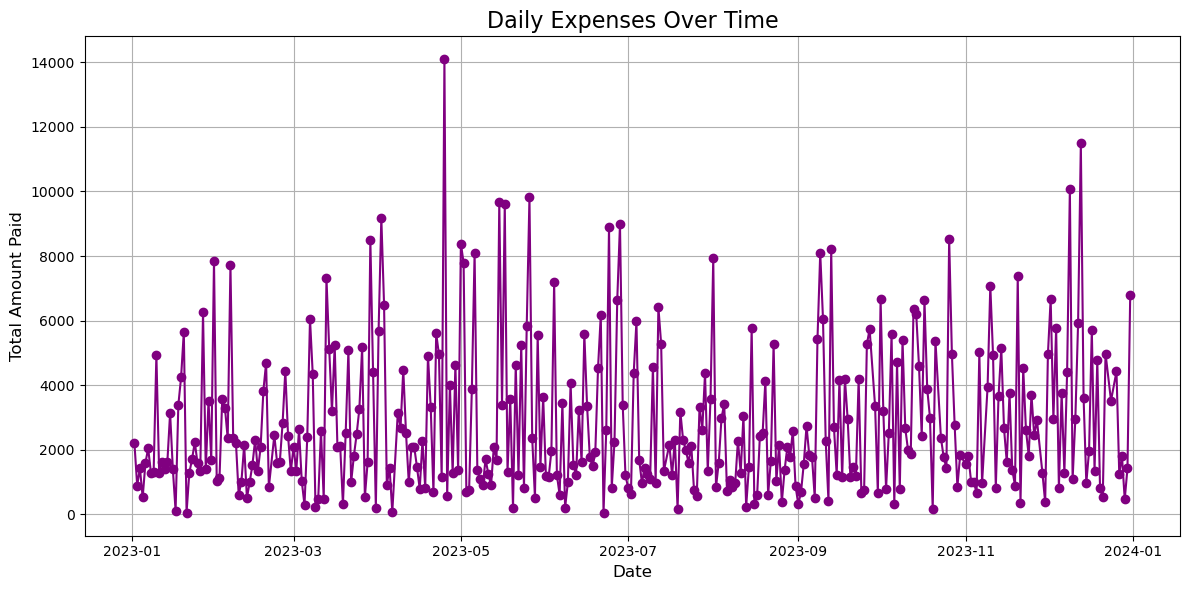

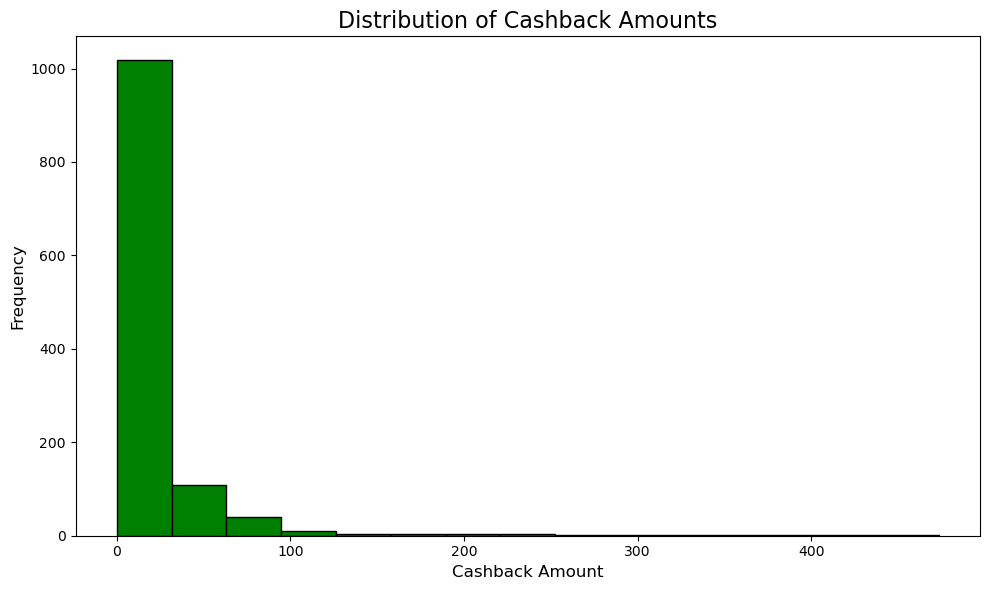

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('expenses_2023.csv')

# Preprocessing Date column for proper handling in visualizations
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# 1. Bar Chart: Total expenses by category
category_expenses = data.groupby('Category')['Amount Paid'].sum()
plt.figure(figsize=(10, 6))
category_expenses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Expenses by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie Chart: Distribution of payment modes
payment_mode_distribution = data['Payment Mode'].value_counts()
plt.figure(figsize=(8, 8))
payment_mode_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Payment Mode Distribution', fontsize=16)
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

# 3. Stacked Bar Chart: Expenses by category and payment mode
expenses_by_category_and_payment = data.pivot_table(
    index='Category', 
    columns='Payment Mode', 
    values='Amount Paid', 
    aggfunc='sum', 
    fill_value=0
)

plt.figure(figsize=(12, 8))
expenses_by_category_and_payment.plot(
    kind='bar', 
    stacked=True, 
    color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
    edgecolor='black'
)
plt.title('Expenses by Category and Payment Mode', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Payment Mode', fontsize=10)
plt.tight_layout()
plt.show()

# 4. Extract month and year from the Date column
data['Month'] = data['Date'].dt.to_period('M')

monthly_expenses = data.groupby('Month')['Amount Paid'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_expenses.index.astype(str), monthly_expenses.values, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Monthly Trend of Expenses', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





<Figure size 1200x800 with 0 Axes>

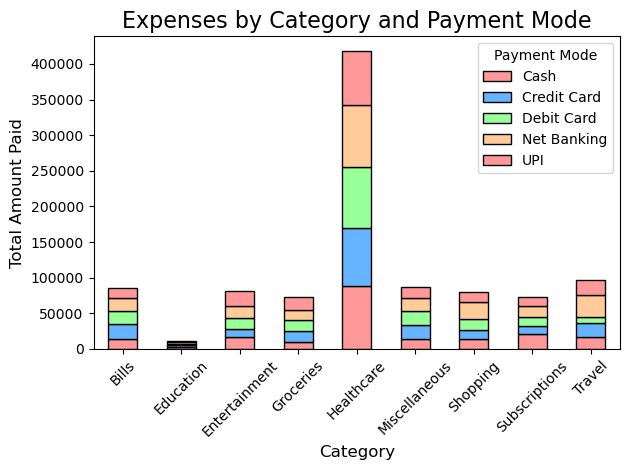

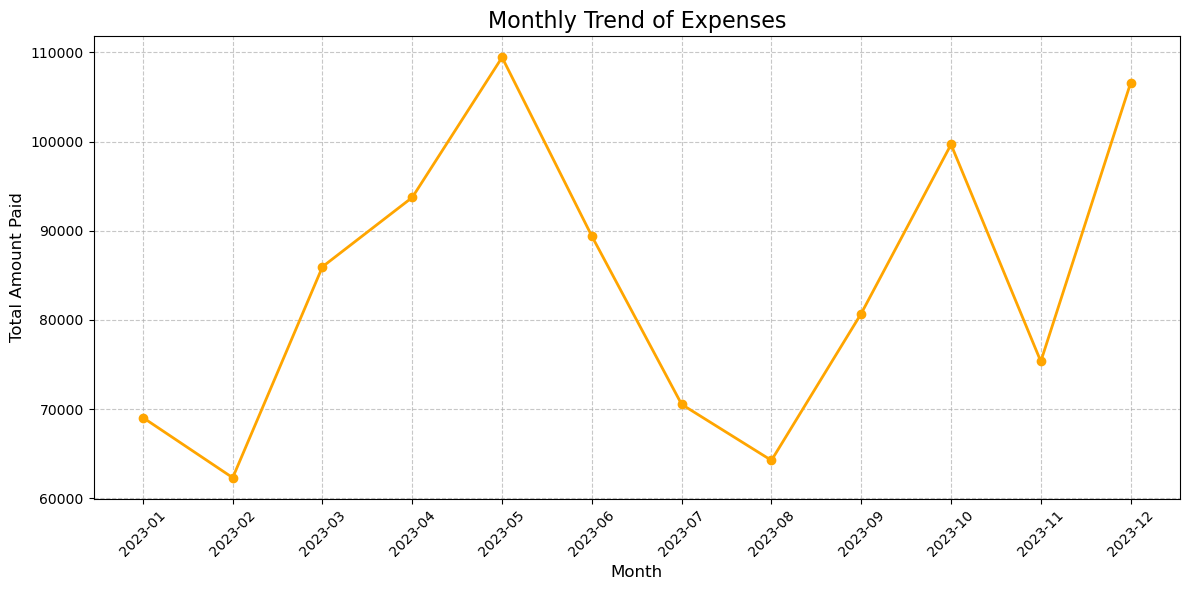

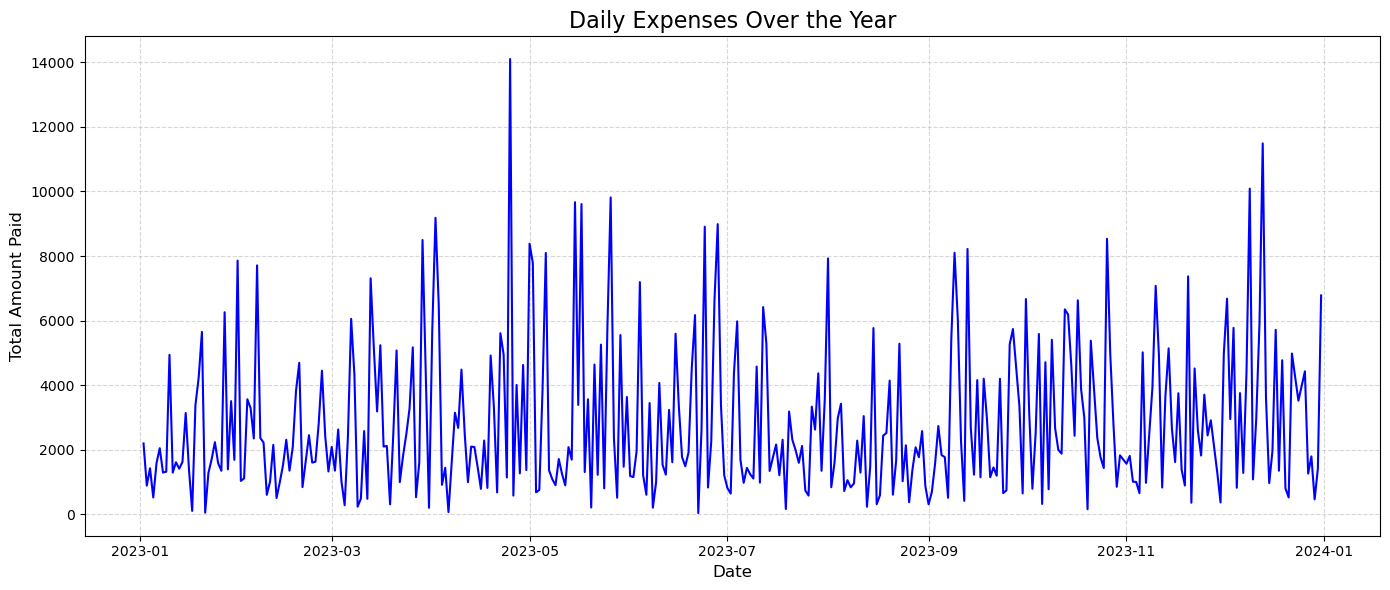

In [4]:
# Calculate daily expenses
daily_expenses = data.groupby('Date')['Amount Paid'].sum()

# Plot the line graph
plt.figure(figsize=(14, 6))
plt.plot(daily_expenses.index, daily_expenses.values, color='blue', linewidth=1.5)
plt.title('Daily Expenses Over the Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
